# Modelling COVID-19 based on COVID-19 data and Google Community Mobility data.

# <h1>Table of Contents</h1>
<ol type='1'>
<li><h2><a href="#preparation">Data Preparation</a></h2></li>
<li><h2><a href="#impact">Impact Analysis</a></h2></li>
<ol type='a'>
<li><h3><a href="#impact">Approach and Techniques</a></h3></li>
<li><h3><a href="#impact_results">Observations</a></h3></li>
</ol>
<li><h2><a href="#trend">Trend Analysis</a></h2></li>
<ol type='a'>
<li><h3><a href="#trend">Approach and Techniques</a></h3></li>
<li><h3><a href="#trend_results">Observations</a></h3></li>
</ol>
<li><h2><a href="#correlation">Correlation Analysis</a></h2></li>
<ol type='a'>
<li><h3><a href="#correlation">Approach and Techniques</a></h3></li>
<li><h3><a href="#correlation_results">Observations</a></h3></li>
</ol>
<li><h2><a href="#summary">Summary</a></h2></li>
<li><h2><a href="#references">References</a></h2></li>
</ol>

# Importing Required Libraries

In [1]:
# !pip install cufflinks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.graph_objects as px
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import seaborn as sns


import warnings 
warnings.filterwarnings ("ignore")


<h1><a name="preparation">Data Preparation: Description of Methods</a></h1>

# Description of process

For this data preparation process, first I will import the required libraries in this project. Then I will use pandas to load the data set in Jupyter notebook. After that I will use different methods to check the data quality. These include (info method used to check dataframe informations for each column, shape methods to see the number of observations and columns, isnull to see how many NaN values in each column). 

Then after I will dropp all the attributes with many missing values. Then checking if there are any categorical columns, and if any, check how many unique instance in them. if there is only one unique instance in them, then that columns should be dropped and if there are many unique instances in it, also will drop it.

Then after remaining with numerical columns, I will handle NaN values by filling them with 0. Then after, I will also droppe the redundant columns (columns providing similar informations). Finally, I will be using describe method to see summary statistics of the data frame. And therefore, I will save the final (cleaned) data frame as csv file. 


# Actual data preparation

In [3]:
# Loading the data set
df = pd.read_csv('rw-mobility-covid-data.csv')
df

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,total_cases,new_cases,new_cases_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
0,2020-02-15,8.0,5.0,7.0,12.0,5.0,-2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-16,1.0,-1.0,-2.0,5.0,6.0,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-17,1.0,0.0,8.0,5.0,7.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-18,0.0,-2.0,9.0,0.0,4.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-19,-4.0,-8.0,7.0,1.0,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,2022-02-27,50.0,28.0,111.0,26.0,23.0,16.0,129489.0,4.0,16.714,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
744,2022-02-28,53.0,23.0,135.0,22.0,26.0,16.0,129502.0,13.0,17.714,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
745,2022-03-01,56.0,21.0,136.0,15.0,25.0,15.0,129516.0,14.0,13.857,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
746,2022-03-02,49.0,15.0,131.0,14.0,24.0,17.0,129533.0,17.0,13.857,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543


In [4]:
# check some statistics
df.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,total_cases,new_cases,new_cases_smoothed,total_deaths,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,720.00000,720.000000,714.000000,643.000000,...,7.200000e+02,7.200000e+02,720.0,720.000,7.200000e+02,7.200000e+02,720.0,7.200000e+02,7.200000e+02,7.200000e+02
mean,2.366310,-10.311497,13.312834,-16.455882,-14.012032,14.926471,40023.73750,179.920833,181.376744,548.636081,...,1.642000e+00,1.854211e+03,56.0,191.375,4.280000e+00,4.700000e+00,21.0,4.617000e+00,6.902000e+01,5.430000e-01
std,31.076527,20.843730,24.857904,24.408053,20.079657,8.498756,44516.22289,314.119722,285.450621,552.305359,...,2.844147e-14,1.592722e-11,0.0,0.000,5.155016e-14,5.243896e-14,0.0,5.599414e-14,8.390233e-13,5.221676e-15
min,-71.000000,-76.000000,-32.000000,-80.000000,-76.000000,-3.000000,1.00000,0.000000,1.143000,1.000000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.280000e+00,4.700000e+00,21.0,4.617000e+00,6.902000e+01,5.430000e-01
25%,-15.000000,-20.000000,-4.000000,-29.000000,-24.000000,10.000000,4474.25000,15.000000,17.714000,36.000000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.280000e+00,4.700000e+00,21.0,4.617000e+00,6.902000e+01,5.430000e-01
50%,2.000000,-9.000000,7.000000,-13.000000,-13.000000,13.000000,19719.00000,55.000000,60.642500,322.000000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.280000e+00,4.700000e+00,21.0,4.617000e+00,6.902000e+01,5.430000e-01
75%,28.000000,5.250000,30.250000,3.000000,1.000000,17.000000,89585.00000,166.250000,160.642750,1237.500000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.280000e+00,4.700000e+00,21.0,4.617000e+00,6.902000e+01,5.430000e-01
max,68.000000,33.000000,167.000000,28.000000,30.000000,47.000000,129543.00000,3072.000000,1396.571000,1458.000000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.280000e+00,4.700000e+00,21.0,4.617000e+00,6.902000e+01,5.430000e-01


In [5]:
# checking the shape of the data frame
df.shape

(748, 57)

In [6]:
# checking data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 57 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                748 non-null    object 
 1   retail_and_recreation_percent_change_from_baseline  748 non-null    float64
 2   grocery_and_pharmacy_percent_change_from_baseline   748 non-null    float64
 3   parks_percent_change_from_baseline                  748 non-null    float64
 4   transit_stations_percent_change_from_baseline       748 non-null    float64
 5   workplaces_percent_change_from_baseline             748 non-null    float64
 6   residential_percent_change_from_baseline            748 non-null    float64
 7   total_cases                                         720 non-null    float64
 8   new_cases                                           720 non-null    float64
 9  

In [7]:
# checking total number of NaN values in each column
df.isnull().sum()

date                                                    0
retail_and_recreation_percent_change_from_baseline      0
grocery_and_pharmacy_percent_change_from_baseline       0
parks_percent_change_from_baseline                      0
transit_stations_percent_change_from_baseline           0
workplaces_percent_change_from_baseline                 0
residential_percent_change_from_baseline                0
total_cases                                            28
new_cases                                              28
new_cases_smoothed                                     34
total_deaths                                          105
new_deaths                                            105
new_deaths_smoothed                                   111
total_cases_per_million                                28
new_cases_per_million                                  28
new_cases_smoothed_per_million                         34
total_deaths_per_million                              105
new_deaths_per

In [8]:
# Dropping columns with NaN values above 680
columns_with_more_NaN = ['total_boosters_per_hundred','people_fully_vaccinated_per_hundred','people_vaccinated_per_hundred',
                        'total_vaccinations_per_hundred','new_vaccinations','total_boosters','people_fully_vaccinated',
                        'people_vaccinated','total_vaccinations']

df_reduced = df.drop(columns=['total_boosters_per_hundred','people_fully_vaccinated_per_hundred',
                              'people_vaccinated_per_hundred','total_vaccinations_per_hundred','new_vaccinations',
                              'total_boosters','people_fully_vaccinated', 'people_vaccinated','total_vaccinations'])

df_reduced

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,total_cases,new_cases,new_cases_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
0,2020-02-15,8.0,5.0,7.0,12.0,5.0,-2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-16,1.0,-1.0,-2.0,5.0,6.0,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-17,1.0,0.0,8.0,5.0,7.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-18,0.0,-2.0,9.0,0.0,4.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-19,-4.0,-8.0,7.0,1.0,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,2022-02-27,50.0,28.0,111.0,26.0,23.0,16.0,129489.0,4.0,16.714,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
744,2022-02-28,53.0,23.0,135.0,22.0,26.0,16.0,129502.0,13.0,17.714,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
745,2022-03-01,56.0,21.0,136.0,15.0,25.0,15.0,129516.0,14.0,13.857,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
746,2022-03-02,49.0,15.0,131.0,14.0,24.0,17.0,129533.0,17.0,13.857,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543


In [9]:
# checking if there are any categorical columns
df_categorical = df_reduced.loc[:,df_reduced.dtypes==np.object]
df_categorical

,date,tests_units
0,2020-02-15,NaN
1,2020-02-16,NaN
2,2020-02-17,NaN
3,2020-02-18,NaN
4,2020-02-19,NaN
...,...,...
743,2022-02-27,samples tested
744,2022-02-28,samples tested
745,2022-03-01,samples tested
746,2022-03-02,samples tested


In [10]:
# checking the unique values in this categorical column
df_categorical['tests_units'].unique()

array([nan, 'samples tested'], dtype=object)

In [11]:
# Dropping this categorical column as it has only one unique category in it
df_reduced.drop(columns=['tests_units'], inplace=True)
df_reduced

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,total_cases,new_cases,new_cases_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
0,2020-02-15,8.0,5.0,7.0,12.0,5.0,-2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-16,1.0,-1.0,-2.0,5.0,6.0,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-17,1.0,0.0,8.0,5.0,7.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-18,0.0,-2.0,9.0,0.0,4.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-19,-4.0,-8.0,7.0,1.0,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,2022-02-27,50.0,28.0,111.0,26.0,23.0,16.0,129489.0,4.0,16.714,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
744,2022-02-28,53.0,23.0,135.0,22.0,26.0,16.0,129502.0,13.0,17.714,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
745,2022-03-01,56.0,21.0,136.0,15.0,25.0,15.0,129516.0,14.0,13.857,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
746,2022-03-02,49.0,15.0,131.0,14.0,24.0,17.0,129533.0,17.0,13.857,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543


In [12]:
# checking information on the reduced data frame
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 47 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                748 non-null    object 
 1   retail_and_recreation_percent_change_from_baseline  748 non-null    float64
 2   grocery_and_pharmacy_percent_change_from_baseline   748 non-null    float64
 3   parks_percent_change_from_baseline                  748 non-null    float64
 4   transit_stations_percent_change_from_baseline       748 non-null    float64
 5   workplaces_percent_change_from_baseline             748 non-null    float64
 6   residential_percent_change_from_baseline            748 non-null    float64
 7   total_cases                                         720 non-null    float64
 8   new_cases                                           720 non-null    float64
 9  

In [13]:
# checking NaN values for the reduced data frame
df_reduced.isnull().sum()

date                                                    0
retail_and_recreation_percent_change_from_baseline      0
grocery_and_pharmacy_percent_change_from_baseline       0
parks_percent_change_from_baseline                      0
transit_stations_percent_change_from_baseline           0
workplaces_percent_change_from_baseline                 0
residential_percent_change_from_baseline                0
total_cases                                            28
new_cases                                              28
new_cases_smoothed                                     34
total_deaths                                          105
new_deaths                                            105
new_deaths_smoothed                                   111
total_cases_per_million                                28
new_cases_per_million                                  28
new_cases_smoothed_per_million                         34
total_deaths_per_million                              105
new_deaths_per

In [14]:
# Checking summary statistics
df_reduced.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,total_cases,new_cases,new_cases_smoothed,total_deaths,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,720.00000,720.000000,714.000000,643.000000,...,7.200000e+02,7.200000e+02,720.0,720.000,7.200000e+02,7.200000e+02,720.0,7.200000e+02,7.200000e+02,7.200000e+02
mean,2.366310,-10.311497,13.312834,-16.455882,-14.012032,14.926471,40023.73750,179.920833,181.376744,548.636081,...,1.642000e+00,1.854211e+03,56.0,191.375,4.280000e+00,4.700000e+00,21.0,4.617000e+00,6.902000e+01,5.430000e-01
std,31.076527,20.843730,24.857904,24.408053,20.079657,8.498756,44516.22289,314.119722,285.450621,552.305359,...,2.844147e-14,1.592722e-11,0.0,0.000,5.155016e-14,5.243896e-14,0.0,5.599414e-14,8.390233e-13,5.221676e-15
min,-71.000000,-76.000000,-32.000000,-80.000000,-76.000000,-3.000000,1.00000,0.000000,1.143000,1.000000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.280000e+00,4.700000e+00,21.0,4.617000e+00,6.902000e+01,5.430000e-01
25%,-15.000000,-20.000000,-4.000000,-29.000000,-24.000000,10.000000,4474.25000,15.000000,17.714000,36.000000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.280000e+00,4.700000e+00,21.0,4.617000e+00,6.902000e+01,5.430000e-01
50%,2.000000,-9.000000,7.000000,-13.000000,-13.000000,13.000000,19719.00000,55.000000,60.642500,322.000000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.280000e+00,4.700000e+00,21.0,4.617000e+00,6.902000e+01,5.430000e-01
75%,28.000000,5.250000,30.250000,3.000000,1.000000,17.000000,89585.00000,166.250000,160.642750,1237.500000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.280000e+00,4.700000e+00,21.0,4.617000e+00,6.902000e+01,5.430000e-01
max,68.000000,33.000000,167.000000,28.000000,30.000000,47.000000,129543.00000,3072.000000,1396.571000,1458.000000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.280000e+00,4.700000e+00,21.0,4.617000e+00,6.902000e+01,5.430000e-01


In [15]:
# setting date column as index
df_reduced.set_index('date', inplace=True)

In [16]:
# Filling the NaN values in those numerical columns with zero

for i in df_reduced.columns:
    df_reduced[i].fillna(0, inplace=True)
    

In [17]:
# check if all NaN values were handled
df_reduced.isnull().sum()

retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
total_cases                                           0
new_cases                                             0
new_cases_smoothed                                    0
total_deaths                                          0
new_deaths                                            0
new_deaths_smoothed                                   0
total_cases_per_million                               0
new_cases_per_million                                 0
new_cases_smoothed_per_million                        0
total_deaths_per_million                              0
new_deaths_per_million                                0
new_deaths_smoothed_per_million                 

In [18]:
# Checking the columns with unique values equal to 2 (1 number + NaN value in it)
Cols_One_Value = []

for i in df_reduced.columns:
    if len(df_reduced[i].unique())<=2:
        Cols_One_Value.append(i)
    else:
        pass
    
Cols_One_Value

['population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'life_expectancy',
 'human_development_index']

In [19]:
# convert date to datetime
df_reduced.index = pd.to_datetime(df_reduced.index)


In [20]:
# checking the columns to remove the redundant attributes
df_reduced.columns

Index(['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'new_tests',
       'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'new_vaccinations_smoothed',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_

In [21]:
# Here are the columns with redundant to other columns in the same data frame
# for example 'new_cases_smoothed','new_cases_smoothed_per_million','new_cases_per_millionn' are redundant to new_cases
Redundant_Cols = ['new_cases_smoothed','new_deaths_smoothed','total_cases_per_million','new_cases_per_millionn',
                       'new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million',
                       'new_deaths_smoothed_per_million','total_tests_per_thousand','new_tests_per_thousand',
                  'new_tests_smoothed','new_tests_smoothed_per_thousand','new_vaccinations_smoothed_per_million',
                 'new_people_vaccinated_smoothed_per_hundred']

df_reduced.drop(columns = ['new_cases_smoothed','new_deaths_smoothed','total_cases_per_million','new_cases_per_million',
                       'new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million',
                       'new_deaths_smoothed_per_million','total_tests_per_thousand','new_tests_per_thousand',
                  'new_tests_smoothed','new_tests_smoothed_per_thousand','new_vaccinations_smoothed_per_million',
                 'new_people_vaccinated_smoothed_per_hundred'], inplace=True)

In [22]:
df_reduced.columns

Index(['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'reproduction_rate', 'new_tests',
       'total_tests', 'positive_rate', 'tests_per_case',
       'new_vaccinations_smoothed', 'new_people_vaccinated_smoothed',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'life_expectancy',
       'human_development_index'],
      dtype='object')

In [23]:
# Check some statistics again using describe
df_reduced.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,total_cases,new_cases,total_deaths,new_deaths,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,...,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,2.366310,-10.311497,13.312834,-16.455882,-14.012032,14.926471,38525.522727,173.185829,471.621658,1.949198,...,1.580535,1784.802032,53.903743,184.211230,4.119786,4.524064,20.213904,4.444171,66.436364,0.522674
std,31.076527,20.843730,24.857904,24.408053,20.079657,8.498756,44330.694876,310.065557,546.382856,3.342972,...,0.311894,352.203216,10.637074,36.351252,0.812976,0.892754,3.988903,0.876989,13.110194,0.103142
min,-71.000000,-76.000000,-32.000000,-80.000000,-76.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-15.000000,-20.000000,-4.000000,-29.000000,-24.000000,10.000000,2698.750000,13.000000,10.750000,0.000000,...,1.642000,1854.211000,56.000000,191.375000,4.280000,4.700000,21.000000,4.617000,69.020000,0.543000
50%,2.000000,-9.000000,7.000000,-13.000000,-13.000000,13.000000,18262.000000,49.000000,252.500000,0.000000,...,1.642000,1854.211000,56.000000,191.375000,4.280000,4.700000,21.000000,4.617000,69.020000,0.543000
75%,28.000000,5.250000,30.250000,3.000000,1.000000,17.000000,86334.750000,153.250000,1075.250000,2.000000,...,1.642000,1854.211000,56.000000,191.375000,4.280000,4.700000,21.000000,4.617000,69.020000,0.543000
max,68.000000,33.000000,167.000000,28.000000,30.000000,47.000000,129543.000000,3072.000000,1458.000000,22.000000,...,1.642000,1854.211000,56.000000,191.375000,4.280000,4.700000,21.000000,4.617000,69.020000,0.543000


In [24]:
# save data frame as csv file

df_reduced.to_csv('vitalh.csv')

<h1><a name="impact">Impact Analysis: Approach and Techniques</a></h1>

## description of approach and techniques

In this problem, I am going to extract mobility data (places) and covid-19 data (stringency_index, new_cases and new_deaths) from the df_reduced. Then plot the interactive time series plot to see the relationship between each government measures (like stringency-index) and covid-data like new-cases and new-deaths with the mobility data (places)


Then, plot the scatter plot of each mobility (place) against these covid-data (new-cases, new-deaths and stringency-index) to see how these variables are correlated

In [25]:
# extracting places and save them in new data frame
df_places = df_reduced[['retail_and_recreation_percent_change_from_baseline',
                       'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
                       'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
                       'residential_percent_change_from_baseline']]

# extracting goverment measure attribute and some covid-19 data attributes and save them in new dataframe
df_gov_Cov_Incidences = df_reduced[['stringency_index','new_cases','new_deaths']]


In [26]:
# joining the two data frame to gether
df_place_govMeasures = df_places.join(df_gov_Cov_Incidences)


In [27]:
# ploting the interactive plot of all places against each covid data and government measures
# using a for loop to iterate through each covid data
# The user can select place and time to observe its relationship with the covid data 

for i in df_gov_Cov_Incidences.columns:
    df_place_govMeasures[['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline',
              'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
              'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline',i]].iplot(

        y=['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline',
          'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
           'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline',i],
        mode='lines',

        opacity=0.8,
        size=8,
        symbol=0,
        xTitle='Date',
        yTitle='Place Selected Values',
        title='Disease Burden and Mobility Trends Over The Period')

In [28]:
# creating a function that will return scatter plot for each place and each government action and covid data
def plot_scatter(df1,df2):
    for i in df1.columns:
        for j in df2.columns:
            figure(figsize=[10,6])
            plt.scatter(df2[j], df1[i], label=j+' vs '+i)
            plt.title(f'Scatter plot for {i}')
            plt.ylabel(i)
            plt.xlabel(j)
            plt.legend()
            plt.show()


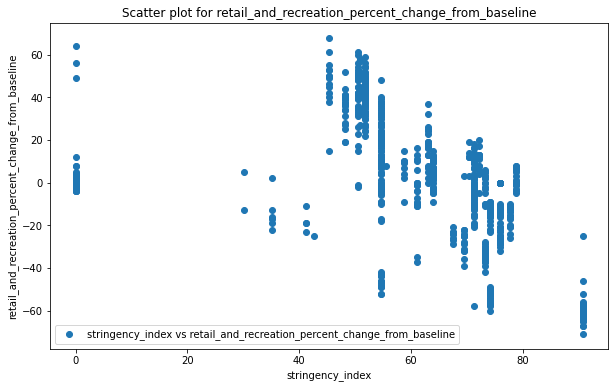

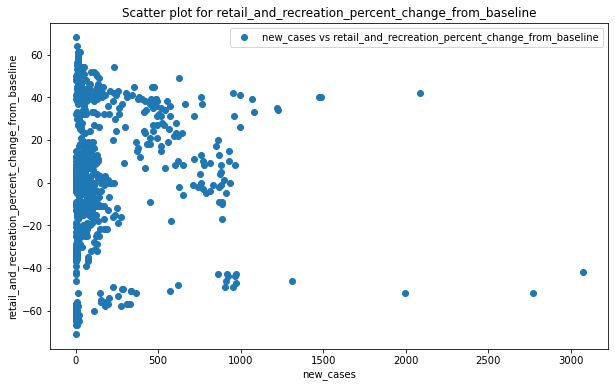

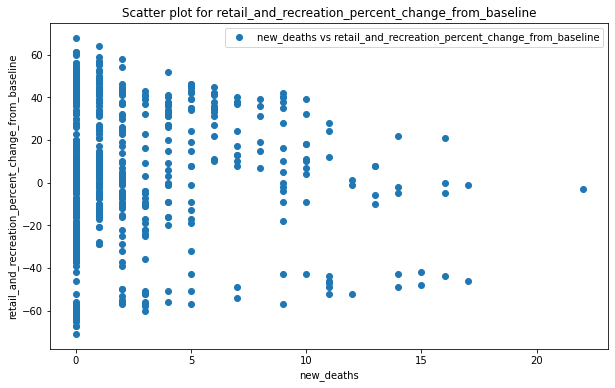

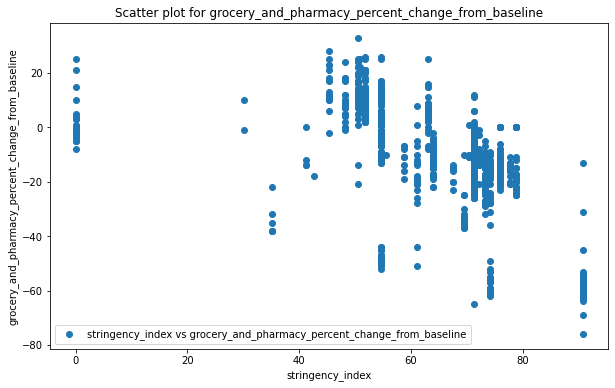

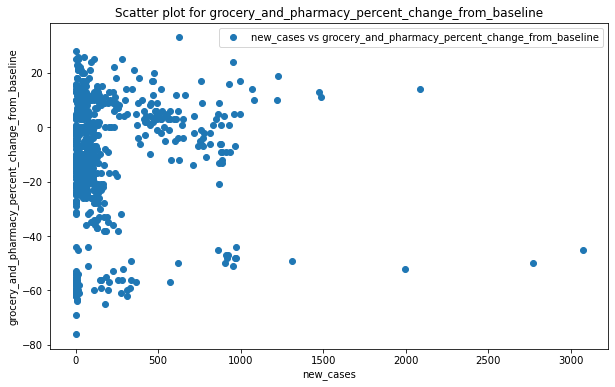

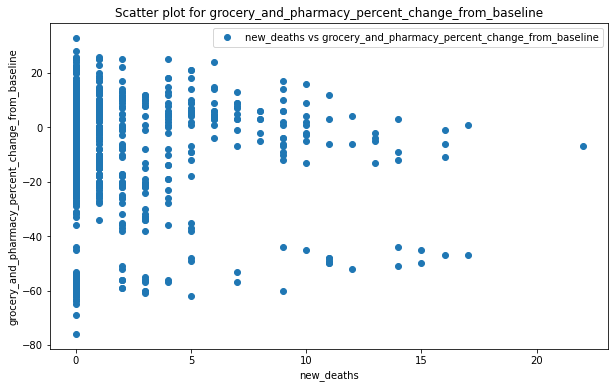

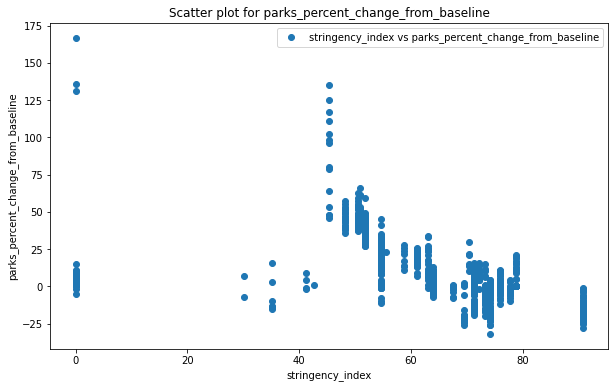

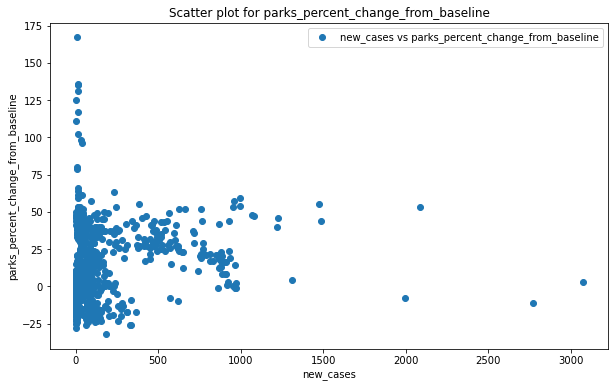

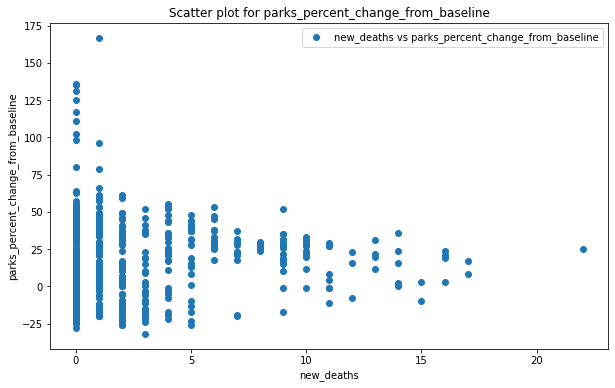

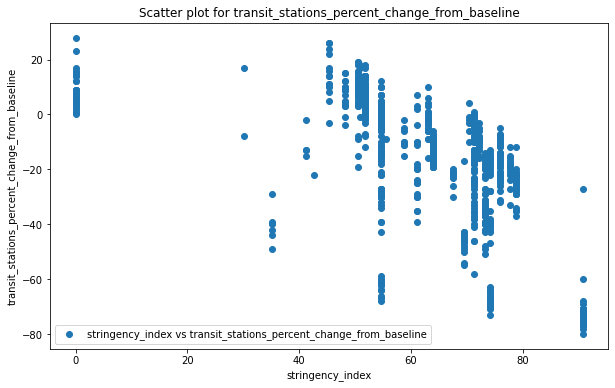

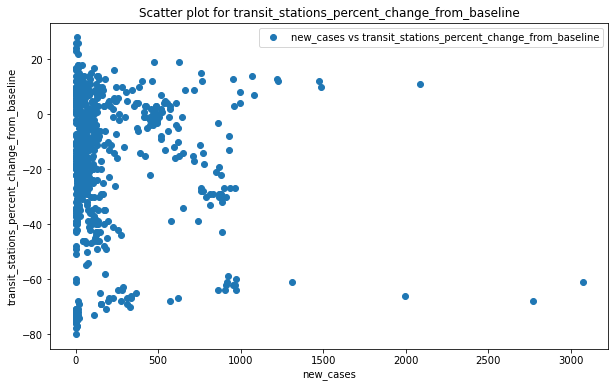

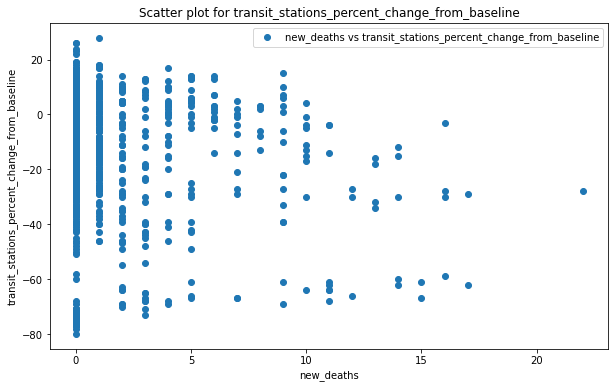

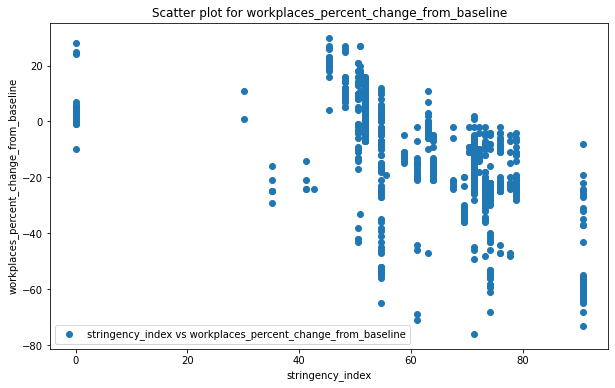

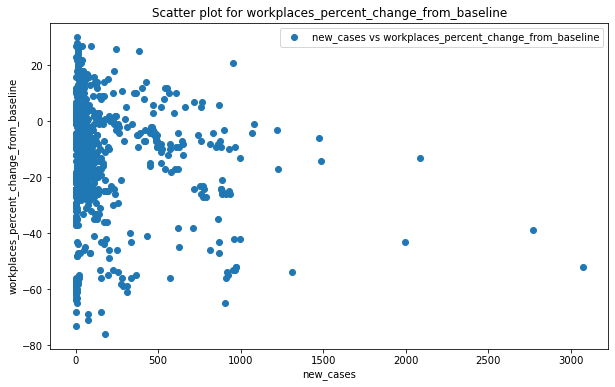

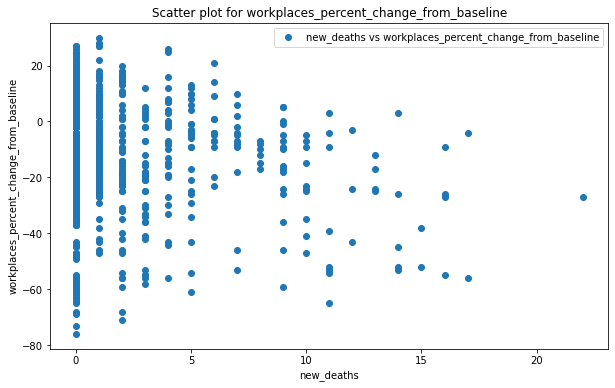

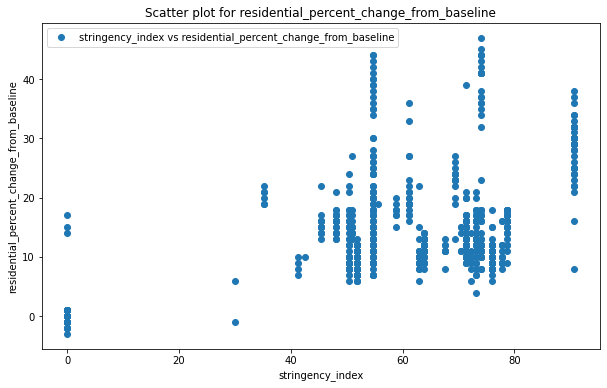

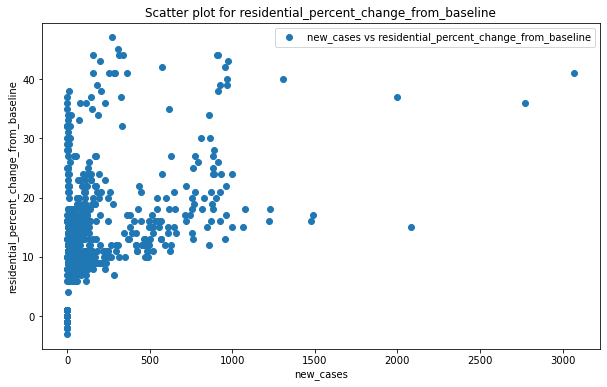

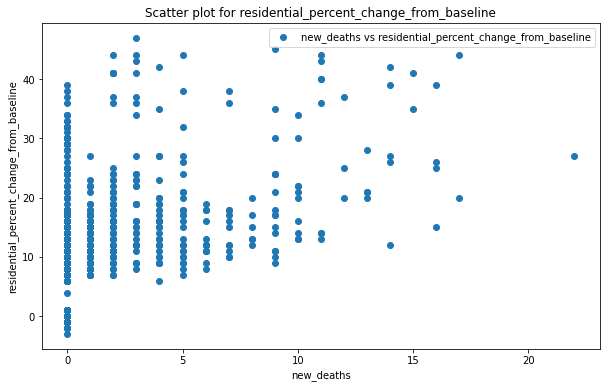

In [29]:
# Recalling the function and passing places and covid dataframes
plot_scatter(df_places,df_gov_Cov_Incidences)

<h1><a name="impact_results">Observations on Impact Analysis </a></h1>

## observations here

`FROM BOTH THE INTERACTIVE PLOTS AND SCATTER PLOTS:`


From the interactive plots above, I can be able to visualize the impact of each govenrment action and new-cases and new-deaths to the mobility data. In this view, starting for `stringency-index`, as we can see for example from from `July 2020 to Jan 2021`, it is found that the `increase in stringency-index has increased the residential-percentage change`. This may be due to the fact that, at this time, government used to take actions to keep the people into lockdown which means residents should increase in percentage. However, `by considering other places, the increase in stringency-index led to the decrease in percentage change in all other places other than resident`.

Then by evaluating for `new-cases`, it is found that for `resident, by increasing new-cases, the resident-percent change increases`. This is mainly to the fact that, when there were many new positive cases, there was lockdowns in many villages with high rate of covid which makes sense to increase the resident percentage. Hower, `in all other places remained, the increase in new-cases led to the decrease in percentage-change`. For instance, with high number of positive cases, people were restricted to go to parks, buses, and many other places which holds many people.

Then final by considering `new-deaths`, except during the starting of covid-19 (before july 2020) where the resident percentage were highly increased withoud deaths (mainly due the lockdown we had for the first day covid found in Rwanda), other period indicates that the resident percentage were increased due to the high number of deaths i.e `increasing deaths led to the increase in residents`. However, for all the remaining places (parks, pharmacy, retail and recreation, transit and workplaces), it is found that `increasing the deaths led to the decreasing in percentage change in all those places`. This is because different measures were taken by government to reduce the deathrate of covid-19 including lockdowns, restricting people to visit those places and more others.

Moverover, as we can see from the scatter plots above, the correlations are different. some are strongly correlated while others are weakly correlated. This means that the rate of `increase and decrease for each variables are totaly different`.





<h1><a name="trend">Trend Analysis: Approach and Techniques</a></h1>

# description of approach and techniques

First, using information obtained from https://builtin.com/data-science/python-plotly, the interactive plots for all the six places will be plotted using iplot method, then each time series plot will be analysed to obtained insights for each place. 

Then government action and other covid data will be inserted on the plot one by one to analyse the impact of this actions to the mobility from the places mentioned.

## Interactive plot of Mobility data that will allow the user to select period and place

In [30]:
# The user will be able to select place and period they want to visualize the trends in mobility data
# plot interactive graph of mobility data (places)
fig = px.line(df_places.reset_index('date'), x='date', y=df_places.columns, 
              title='Mobility Time Series In Different Periods')

# Update the figure by seeting the x-axis period that the user may want to choose
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=12, label="12m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [31]:
# ploting the interactive plot of all places against each covid data and government measures
# using a for loop to iterate through each covid data
# The user can select place and time to observe its relationship with the covid data 

for i in df_gov_Cov_Incidences.columns:
    df_place_govMeasures[['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline',
              'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
              'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline',i]].iplot(

        y=['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline',
          'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
           'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline',i],
        mode='lines',

        opacity=0.8,
        size=8,
        symbol=0,
        xTitle='Date',
        yTitle='Place Selected Values',
    #     text='title',
        title='Disease Burden and Mobility Trends Over The Period')

<h1><a name="trend_results">Observations on Trend Analysis</a></h1>

## observations here

`FROM THESE INTERACTIVE PLOTS:`


From these interactive plots above, we can be able to visualize the relationship between mobility and covid data. by starting for `stringency-index and residential-percentage-change`, from `March-2020 to May-2021, Jan-2021 to Feb-2021 and July-2021 to Agust-2021` there was a sharp rise in residential percentage change. And on `March-16-2020`, the stringency index reached to its highest value. This due to the total lockdowns taken due to the first time covid found in Rwanda. Overal, the increase in stringency-index led to the increase in resident-percentage-change as the measures taken were restring people to move from their homes. However, almost within the same period of time, `March-2020 to May-2021, Jan-2021 to Feb-2021 and July-2021 to Agust-2021`, the percentage-change of people in all other places (parks, pharmacy, retail and recreation, transit and workplaces) were decreased due to the measures taken by the government. Therefore, `increasing stringency-index led to the decrease of percentage-change in those places`.


Then, the same principle applies to both `new-cases and new-deaths`. By carefully look at those time series interactive plots, we can observe that `with increasing new-cases and new-deaths`, led to the `increase in in resident-percentage change` and `decrease in percentage-change of people in the rest of all those places mentioned above`. For instance, with high number of positive cases, people were restricted to go to parks, buses, and many other places which holds many people.


However, the exception is for the starting of covid-19 in Rwanda i.e `March-2020` where there was a sharp increase in `resident-percentage` and sharp drops/decrease in percentage-change for the rest those places mentioned (parks, pharmacy, retail and recreation, transit and workplaces) with really `lower number of deaths and new-cases`. This is because there was `an immediate total-lockdown` in Rwanda to avoid the spread of covid-19 pandemic in people.

Therefore, from the time series plot above, I can confirm that `Resident` is the most place that experienced the biggest changes in mobility patterns.


<h1><a name="correlation">Correlation Analysis: Approach and Techniques</a></h1>

## description of approach and techniques

In this section, I am going to calculate and evaluate the correlation coefficient between mobility data (places) and covid data (stringency-index, new-cases ...) to see which variables are more correlated to the mobility data

I will be using .corr() method to calculate the correlation and I will use searborn to visualize the heatmap of the correlation matrix.

In [32]:
# Extracting mobility data (places)
df_places = df_reduced[['retail_and_recreation_percent_change_from_baseline',
                       'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
                       'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
                       'residential_percent_change_from_baseline']]

# Extracting some attributes from covid data that I will be using to evaluate the correlation
df_gov_Cov_Incidences = df_reduced[['stringency_index','new_cases','new_deaths','new_tests','new_people_vaccinated_smoothed']]


In [33]:
# combining the two data frames
df_combined = df_places.join(df_gov_Cov_Incidences)

In [34]:
#Rename columns
name_mapping={'retail_and_recreation_percent_change_from_baseline':'retail_recreation',\
              'grocery_and_pharmacy_percent_change_from_baseline' :'grocery_pharmacy',\
              'parks_percent_change_from_baseline' :'parks',\
              'transit_stations_percent_change_from_baseline':'transit',\
              'workplaces_percent_change_from_baseline':'workplaces',
              'residential_percent_change_from_baseline':'residential',\
             'stringency_index':'stringency', 'new_cases':'new_cases', 'new_deaths':'new_deaths',\
             'new_tests':'new_tests', 'new_people_vaccinated_smoothed':'new_vaccinated'}

df_combined.rename(name_mapping, axis=1, inplace=True)

In [35]:
# calculating correlation
Correlation = df_combined.corr()
Correlation

,retail_recreation,grocery_pharmacy,parks,transit,workplaces,residential,stringency,new_cases,new_deaths,new_tests,new_vaccinated
retail_recreation,1.000000,0.931299,0.831877,0.918315,0.845833,-0.589122,-0.526140,0.045089,0.017498,0.467423,0.549759
grocery_pharmacy,0.931299,1.000000,0.754286,0.945419,0.866176,-0.714189,-0.547073,0.031948,-0.007778,0.423926,0.419551
parks,0.831877,0.754286,1.000000,0.732663,0.689871,-0.266784,-0.515387,0.164480,0.108818,0.547499,0.490349
transit,0.918315,0.945419,0.732663,1.000000,0.841840,-0.754407,-0.604741,-0.060389,-0.105810,0.375054,0.415071
workplaces,0.845833,0.866176,0.689871,0.841840,1.000000,-0.730387,-0.564679,-0.117109,-0.119248,0.378695,0.414360
residential,-0.589122,-0.714189,-0.266784,-0.754407,-0.730387,1.000000,0.400218,0.368875,0.385816,-0.060592,-0.192506
stringency,-0.526140,-0.547073,-0.515387,-0.604741,-0.564679,0.400218,1.000000,-0.167995,-0.157520,-0.216340,-0.266776
new_cases,0.045089,0.031948,0.164480,-0.060389,-0.117109,0.368875,-0.167995,1.000000,0.670759,0.297735,0.111142
new_deaths,0.017498,-0.007778,0.108818,-0.105810,-0.119248,0.385816,-0.157520,0.670759,1.000000,0.098459,0.039951
new_tests,0.467423,0.423926,0.547499,0.375054,0.378695,-0.060592,-0.216340,0.297735,0.098459,1.000000,0.398424


In [36]:
# Extracting covid data attributes to be used to evaluate this correlation
df_govnment = df_combined[['stringency','new_cases','new_deaths','new_tests','new_vaccinated']]

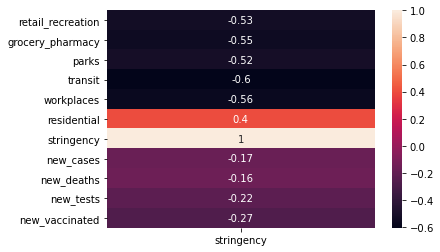

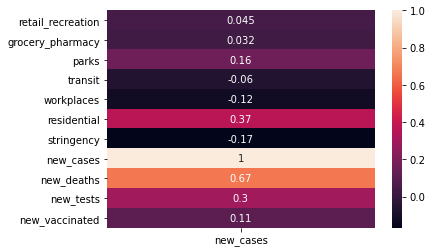

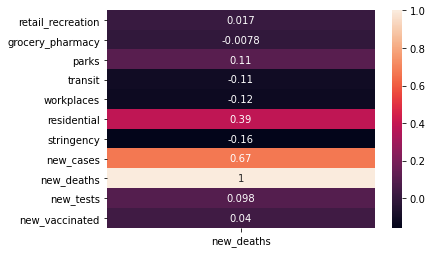

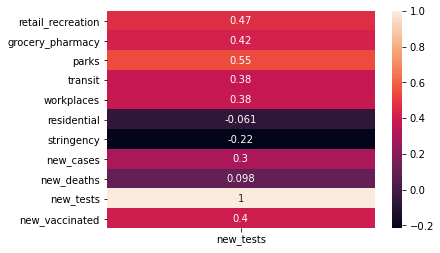

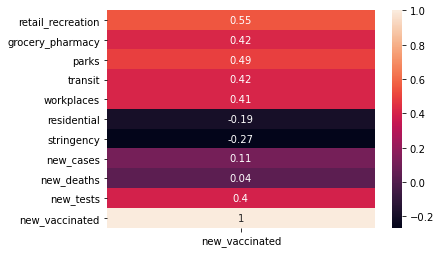

In [37]:
# loop through each covid data attributes to find the correlation between each place data and this covid data
for i in df_govnment.columns:
    corr = Correlation[[i]]
    sns.heatmap(corr, annot=True)
    plt.show()

<h1><a name="correlation_results">Observations on Correlation Analysis</a></h1>

# observations here

With the help of heatmap plot of correlation above, we can be able to see the correlation coefficient between government actions and any covid data (new-cases, new-deaths etc) with each mobility data (places).

In the correlation obtained, some correlations are `negative` and others are `positive`. For negative correlations indicates that the increase in one variable led to the decrease in other variable and vice-versa while for the positive correlations indicates that the increase in one variable led to the increase in other variabe and vice-versa.

From the features I used, the most correlated variables than others are: `1. stringeny-index and transit` with correlation of `-0.6` which means that as stringency-index increases, the transit-percentage changes reduces. `2. new-cases and residential` with correlation of `0.37` which means that as the new-cases increases, the resident-percentage change also increases. `3. new-deaths and residential` with correlation of `0.39` which means that as the new-cases increases, the resident-percentage change also increases. and so on. Therefore, this correlation heatmap can help us to identify the most places that experienced biggest changes in mobility patterns too and how much is correlated with the government action or those covid-19 data (new-cases, new-deaths, new-vaccinated etc)

<h1><a name="summary">Summary</a></h1>

# Summary goes here

To summ up what I have done, first about the `Data Quality`, the data set given had many columns with too many missing values which really provide few information about the attribute comparing to the observations made. Therefore, those columns (attributes) `were dropped`. However, there was also other attributes with missing values but less than the half of observations made. Those were filled by `0`. In addition to those, one attribute was categorical with only one unique instance, this was also `dropped` as it didn't provide any information. With `Data Quality` also, I checked the attribute type where for instance here the `date` were converted to `date-time` and I checked the `redundant columns` i.e attributes that are providing similar informaitons, those were also dropped.


About `the insights obtained from part-2,3 and 4`, I found that `residential` is the most place which experienced the biggest change in mobility patterns. In addition, I found that `residential place` is strongly positively correlated with `new-cases and new-deaths` which means that increase in one these covid data (new-cases and new-deaths) led to the increase in residential percentage-change i.e many people were forced to stay in their homes. For instance, different measures were taken to reduce the spread of covid.


This dataset can be potentially used by `government policy makers` to access the impact caused by covid-19 for different places and `made decisions and policies` on how to help people in those areas. In addition, this dataset can be used by `economist` to access the impact of covid-19 on economy especially in the field (places) mentioned, and find the biggest place that were `negatively` affected by this pandemic and `set measures` to help businesses in those areas working again.



<h1><a name="references">References</a></h1>

#references
https://www.google.com/covid19/mobility/ 

https://ourworldindata.org/coronavirus/country/rwanda 
